>>> # farmer Guidencence Prediction model

In [23]:
from ipywidgets import interact       # good libraries for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
data=pd.read_csv('farmer.csv')
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
data['label'].value_counts()

mothbeans      100
chickpea       100
coconut        100
cotton         100
maize          100
watermelon     100
apple          100
jute           100
kidneybeans    100
muskmelon      100
pigeonpeas     100
orange         100
mango          100
coffee         100
mungbean       100
lentil         100
banana         100
papaya         100
blackgram      100
rice           100
grapes         100
pomegranate    100
Name: label, dtype: int64

# average value of nitrogen and phosphorus

In [5]:
print('average ratio of nitrogen in the soil :{0:2f}'.format(data['N'].mean()))
print('average ratio of phosphorus in the soil :{0:2f}'.format(data['P'].mean()))
print('average ratio of Potesiume in the soil :{0:2f}'.format(data['K'].mean()))
print('average ratio of temperature in the soil :{0:2f}'.format(data['temperature'].mean()))

average ratio of nitrogen in the soil :50.551818
average ratio of phosphorus in the soil :53.362727
average ratio of Potesiume in the soil :48.149091
average ratio of temperature in the soil :25.616244


# interactive function fo each crop
# we will improve this function

In [6]:
@interact
def summary(crops=list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print("-------------------------------------------")
    print('statistics for nitrogen')
    print('minimum nitrogen required :-',x['N'].min())
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print('minimum phosphorus required :-',x['P'].min())
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print('minumum  potasium required :-',x['K'].min())


interactive(children=(Dropdown(description='crops', options=('mothbeans', 'chickpea', 'coconut', 'cotton', 'maâ€¦

In [7]:
crops=list(data['label'].value_counts().index)
crops

['mothbeans',
 'chickpea',
 'coconut',
 'cotton',
 'maize',
 'watermelon',
 'apple',
 'jute',
 'kidneybeans',
 'muskmelon',
 'pigeonpeas',
 'orange',
 'mango',
 'coffee',
 'mungbean',
 'lentil',
 'banana',
 'papaya',
 'blackgram',
 'rice',
 'grapes',
 'pomegranate']

# average of all features by interactive function

In [8]:
@interact
def compare(features=['N','P','K','temperature','humidity','ph','rainfall']):
    print('average value for ',features,'is {0:2f}'.format(data[features].mean()))

interactive(children=(Dropdown(description='features', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph'â€¦

# average value for each class of crops label by using interactive function

In [9]:
@interact
def compare(features=['N','P','K','temperature','humidity','ph','rainfall']):
#     print('average value for ',features,'is {0:2f}'.format(data[features].mean()))
    print(f'average for features {data[features].mean().round(2)}')
    print(f"for mungbean :-  {data[data['label']=='mungbean'][features].mean().round(2)}")
    print(f"for pomegranate :-  {data[data['label']=='pomegranate'][features].mean().round(2)}")
    print(f"for RICE :-  {data[data['label']=='rice'][features].mean().round(2)}")
    print(f"for coconut :-  {data[data['label']=='coconut'][features].mean().round(2)}")
    print(f"for maize :-  {data[data['label']=='maize'][features].mean().round(2)}")

    print(f"for coffee :-  {data[data['label']=='coffee'][features].mean().round(2)}")

    print(f"for banana :-  {data[data['label']=='banana'][features].mean().round(2)}")

    print(f"for kidneybeans :-  {data[data['label']=='kidneybeans'][features].mean().round(2)}")
    print(f"for grapes :-  {data[data['label']=='grapes'][features].mean().round(2)}")
    print(f"for blackgram :-  {data[data['label']=='blackgram'][features].mean().round(2)}")
    print(f"for pigeonpeas :-  {data[data['label']=='pigeonpeas'][features].mean().round(2)}")
    print(f"for chickpea :-  {data[data['label']=='chickpea'][features].mean().round(2)}")
    print(f"for mango :-  {data[data['label']=='mango'][features].mean().round(2)}")
    print(f"for mothbeans :-  {data[data['label']=='mothbeans'][features].mean().round(2)}")
    print(f"for jute :-  {data[data['label']=='jute'][features].mean().round(2)}")
    print(f"for apple :-  {data[data['label']=='apple'][features].mean().round(2)}")
    print(f"for watermelon :-  {data[data['label']=='watermelon'][features].mean().round(2)}")
    print(f"for muskmelon :-  {data[data['label']=='muskmelon'][features].mean().round(2)}")
    print(f"for orange :-  {data[data['label']=='orange'][features].mean().round(2)}")
    print(f"for cotton :-  {data[data['label']=='cotton'][features].mean().round(2)}")
    print(f"for lentil :-  {data[data['label']=='lentil'][features].mean().round(2)}")
    print(f"for papaya :-  {data[data['label']=='papaya'][features].mean().round(2)}")




interactive(children=(Dropdown(description='features', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph'â€¦

# what crops grow in greater than average of N,P,K,and so on

In [10]:
@interact
def less_greater(features=['N','P','K','temperature','humidity','ph','rainfall']):
    print('cropps which require greatere than average',features,'\n')
    print(data[data[features] >data[features].mean()]['label'].unique())
    print()
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print()
    print(data[data[features] <=data[features].mean()]['label'].unique())


interactive(children=(Dropdown(description='features', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph'â€¦

## 3xplainin9 thi5 function

In [31]:
data[data['N']>50.551818181818184].shape

(899, 8)

In [32]:
data[data['N'] >data['N'].mean()].shape


(899, 8)

In [40]:
data[data['N'] >data['N'].mean()]['label'].unique()

array(['rice', 'maize', 'chickpea', 'blackgram', 'banana', 'watermelon',
       'muskmelon', 'papaya', 'cotton', 'jute', 'coffee'], dtype=object)

In [41]:
data[data['N'] >data['N'].mean()]['label'].nunique()

11

# distibutrition plot of every features

In [11]:
data

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [15]:
sns.set(rc={'figure.figsize':(10,9)})
plt.subplot(4,2,1)
sns.distplot(data['N'],color='g')
plt.legend()
plt.subplot(4,2,2)
sns.distplot(data['P'],color='b')

plt.subplot(4,2,3)
sns.distplot(data['K'],color='r')

plt.subplot(4,2,4)
sns.distplot(data['temperature'],color='brown')

plt.subplot(4,2,5)
sns.distplot(data['humidity'],color='yellow')
             

plt.subplot(4,2,6)
sns.distplot(data['ph'],color='pink')

plt.subplot(4,2,7)
sns.distplot(data['rainfall'])



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future ve

<AxesSubplot:xlabel='rainfall', ylabel='Density'>

In [20]:
print('summer crops')
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print('...............................')
print('winter crops')
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,')
print('Rainy crops')
print(data[(data['rainfall']>200)&(data['humidity']>30)]['label'].unique())

summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
...............................
winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rainy crops
['rice' 'papaya' 'coconut']


## import the clustering KMeans algorithium
we will do clustering analysis

In [21]:
from sklearn.cluster import KMeans

In [22]:
x=data.drop(['label'],axis=1)

In [23]:
x.head()

N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

In [24]:
x=x.values

In [25]:
x

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [26]:
x.shape

(2200, 7)

## how many cluster need in this algorithium check by using elbow method

In [100]:
plt.rcParams['figure.figsize']=(10,4)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
# lets the plot
plt.plot(range(1,11),wcss)
plt.title('the elbow method',fontsize=21)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

## select the last elbow it means , i need to 4 clusters

In [33]:
len(wcss)

10

In [34]:
wcss

[18820170.463645905,
 12070916.353533493,
 7423970.865410885,
 5337369.95029839,
 4417511.116768213,
 3748646.207999499,
 3122776.0933495285,
 2727858.093756842,
 2374020.036785366,
 2132297.3163274406]

In [109]:
sns.set(style='ticks')
plt.plot(wcss,marker='*',ms=18,mfc='r')          # simplifie
plt.title('find the elbow',fontsize=25,color='k')
plt.show()

## apply the clustering analysis

In [40]:
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)


In [41]:
y_means=km.fit_predict(x)

In [42]:
y_means

array([3, 3, 3, ..., 3, 1, 3])

In [43]:
y_means.shape

(2200,)

In [44]:
y_means=pd.DataFrame(y_means)

In [46]:
y_means.head()

0
0  3
1  3
2  3
3  3
4  3

In [48]:
y_means[0].value_counts() # i have 4 clusters

0    1009
1     517
3     474
2     200
Name: 0, dtype: int64

In [49]:
y_means[0].value_counts().sum()

2200

In [51]:
data.shape[0]

2200

In [53]:
label=data['label']

In [54]:
label

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [57]:
df=pd.concat([y_means,label],axis=1)
df.head()

0 label
0  3  rice
1  3  rice
2  3  rice
3  3  rice
4  3  rice

In [60]:
df=df.rename({0:'cluster'},axis=1)

In [61]:
df.head()
# i made a mistake by mistake we has done inplace true in index okay lets keep on

cluster label
cluster        3  rice
1              3  rice
2              3  rice
3              3  rice
4              3  rice

In [62]:
df.index

Index(['cluster',         1,         2,         3,         4,         5,
               6,         7,         8,         9,
       ...
            2190,      2191,      2192,      2193,      2194,      2195,
            2196,      2197,      2198,      2199],
      dtype='object', length=2200)

In [65]:
df[df['cluster']==0]['label'].unique()

array(['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
       'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango',
       'orange', 'papaya', 'coconut'], dtype=object)

In [66]:
df[df['cluster']==1]['label'].unique()

array(['maize', 'banana', 'watermelon', 'muskmelon', 'papaya', 'cotton',
       'coffee'], dtype=object)

In [67]:
df[df['cluster']==2]['label'].unique()

array(['grapes', 'apple'], dtype=object)

In [68]:
df[df['cluster']==3]['label'].unique()

array(['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee'],
      dtype=object)

# start the predictive model training 

In [26]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [27]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [29]:
x=data.drop(columns=['label'],axis=1)
y=data[['label']]

In [30]:
x

N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

In [31]:
y

label
0       rice
1       rice
2       rice
3       rice
4       rice
...      ...
2195  coffee
2196  coffee
2197  coffee
2198  coffee
2199  coffee

[2200 rows x 1 columns]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

In [60]:
y_test.shape,y_train.shape

((440, 1), (1760, 1))

In [68]:
x_test.shape, 

((440, 7),)

In [69]:
x_test

N   P   K  temperature   humidity        ph    rainfall
1159   29  35  28    28.347161  53.539031  6.967418   90.402604
499    33  61  24    20.046118  48.939056  4.567446  122.456420
1609   13  23   6    23.961476  90.264080  7.365338  102.695870
1924  125  39  21    25.031496  82.212766  7.954629   95.019132
661    30  44  16    29.730130  82.891664  6.442336   50.915113
...   ...  ..  ..          ...        ...       ...         ...
1374   81  16  45    26.904357  86.254262  6.727468   59.759800
1716   49  55  53    38.441872  93.637390  6.544030   77.715669
2121   83  21  28    25.567483  60.492446  7.466901  190.225784
1141   26  32  32    30.914715  49.929639  6.810186   90.140478
1645   40  22   6    24.536101  91.909972  6.488221  115.978799

[440 rows x 7 columns]

In [70]:
y_test

label
1159       mango
499   pigeonpeas
1609      orange
1924      cotton
661     mungbean
...          ...
1374  watermelon
1716      papaya
2121      coffee
1141       mango
1645      orange

[440 rows x 1 columns]

In [71]:
x_train


N    P    K  temperature   humidity        ph    rainfall
845   24   61   17    22.637142  65.445449  6.233269   38.304111
812    3   69   23    28.674088  63.188330  7.299361   42.960186
1435  88   17   52    29.904159  90.752844  6.646962   25.378284
1845  39    7   29    27.542732  94.590861  6.362544  150.201214
71    67   45   38    22.727910  82.170688  7.300411  260.887506
...   ..  ...  ...          ...        ...       ...         ...
1276  25  129  195    17.986678  81.177121  5.777271   72.371277
28    60   49   44    20.775761  84.497744  6.244841  240.081065
826   32   56   18    20.046771  65.843953  7.135252   46.053331
2064  89   58   35    23.986517  82.090534  6.096839  167.057646
722   52   71   16    27.742748  68.539971  7.075886   71.786153

[1760 rows x 7 columns]

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr=LogisticRegression()

In [64]:
lr.fit(x_train,y_train)

C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
lr.score(x_test,y_test)                   # accuracy by using LogisticRegressor

0.9477272727272728

In [76]:
x_test

N   P   K  temperature   humidity        ph    rainfall
1159   29  35  28    28.347161  53.539031  6.967418   90.402604
499    33  61  24    20.046118  48.939056  4.567446  122.456420
1609   13  23   6    23.961476  90.264080  7.365338  102.695870
1924  125  39  21    25.031496  82.212766  7.954629   95.019132
661    30  44  16    29.730130  82.891664  6.442336   50.915113
...   ...  ..  ..          ...        ...       ...         ...
1374   81  16  45    26.904357  86.254262  6.727468   59.759800
1716   49  55  53    38.441872  93.637390  6.544030   77.715669
2121   83  21  28    25.567483  60.492446  7.466901  190.225784
1141   26  32  32    30.914715  49.929639  6.810186   90.140478
1645   40  22   6    24.536101  91.909972  6.488221  115.978799

[440 rows x 7 columns]

In [75]:
lr.predict(x_test).shape

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [67]:
y_pred=lr.predict(x_test)
y_pred

array(['mango', 'pigeonpeas', 'orange', 'cotton', 'mungbean', 'coconut',
       'pigeonpeas', 'maize', 'watermelon', 'mango', 'apple', 'chickpea',
       'pomegranate', 'coffee', 'papaya', 'grapes', 'apple', 'coconut',
       'papaya', 'rice', 'jute', 'grapes', 'lentil', 'cotton', 'maize',
       'coconut', 'pomegranate', 'mango', 'watermelon', 'jute', 'coconut',
       'kidneybeans', 'banana', 'coconut', 'rice', 'pomegranate',
       'blackgram', 'blackgram', 'pomegranate', 'jute', 'rice', 'lentil',
       'papaya', 'pomegranate', 'kidneybeans', 'mungbean', 'chickpea',
       'watermelon', 'lentil', 'coconut', 'mango', 'apple', 'grapes',
       'blackgram', 'maize', 'muskmelon', 'mungbean', 'muskmelon',
       'muskmelon', 'pomegranate', 'kidneybeans', 'lentil', 'rice',
       'coconut', 'pigeonpeas', 'rice', 'grapes', 'coconut', 'coffee',
       'maize', 'jute', 'pigeonpeas', 'mango', 'rice', 'rice',
       'muskmelon', 'rice', 'jute', 'cotton', 'banana', 'coconut',
       'mothbeans

In [40]:
confusion_matrix(y_test,y_pred)      # checking for accuracy

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,

## draw a chart with the help of confusion_matrix because i can not judge a numerical form data

In [41]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap=plt.cm.coolwarm)
plt.title('confusion heatmap for logistic regression')
plt.show()

In [42]:
cm.shape

(22, 22)

## classification report for precision and recall
it must become a good score

In [43]:
classification_report(y_test,y_pred)
# it is ruturns a string output if you want to show in a particular
# format than you have to use print function for this string

'              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        22\n      banana       1.00      1.00      1.00        20\n   blackgram       0.94      0.84      0.89        19\n    chickpea       1.00      1.00      1.00        26\n     coconut       0.96      0.96      0.96        23\n      coffee       0.91      1.00      0.95        21\n      cotton       0.95      0.90      0.92        20\n      grapes       1.00      1.00      1.00        11\n        jute       0.80      0.87      0.83        23\n kidneybeans       1.00      1.00      1.00        16\n      lentil       0.85      0.94      0.89        18\n       maize       0.88      0.91      0.89        23\n       mango       1.00      1.00      1.00        20\n   mothbeans       0.85      0.69      0.76        16\n    mungbean       0.94      1.00      0.97        16\n   muskmelon       1.00      1.00      1.00        20\n      orange       1.00      1.00      1.00        12\n      p

In [44]:
cp=classification_report(y_test,y_pred)
print(cp)
# precision and recall value have a good score

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        20
   blackgram       0.94      0.84      0.89        19
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      0.96      0.96        23
      coffee       0.91      1.00      0.95        21
      cotton       0.95      0.90      0.92        20
      grapes       1.00      1.00      1.00        11
        jute       0.80      0.87      0.83        23
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.85      0.94      0.89        18
       maize       0.88      0.91      0.89        23
       mango       1.00      1.00      1.00        20
   mothbeans       0.85      0.69      0.76        16
    mungbean       0.94      1.00      0.97        16
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        12
      papaya       0.95    

In [45]:
y_test['predicted_value']=lr.predict(x_test)

In [46]:
y_test.head(20)

label predicted_value
1159        mango           mango
499    pigeonpeas      pigeonpeas
1609       orange          orange
1924       cotton          cotton
661      mungbean        mungbean
1839      coconut         coconut
475    pigeonpeas      pigeonpeas
141         maize           maize
1317   watermelon      watermelon
1107        mango           mango
1508        apple           apple
283      chickpea        chickpea
938   pomegranate     pomegranate
2129       coffee          coffee
1755       papaya          papaya
1293       grapes          grapes
1504        apple           apple
1873      coconut         coconut
1737       papaya          papaya
67           rice            rice

In [47]:
y_test['label'].value_counts()

watermelon     29
rice           27
chickpea       26
papaya         23
jute           23
coconut        23
maize          23
apple          22
coffee         21
muskmelon      20
banana         20
mango          20
cotton         20
blackgram      19
pomegranate    18
lentil         18
pigeonpeas     17
mungbean       16
kidneybeans    16
mothbeans      16
orange         12
grapes         11
Name: label, dtype: int64

In [48]:
y_test['predicted_value'].value_counts()

watermelon     29
chickpea       26
jute           25
maize          24
rice           24
coffee         23
coconut        23
papaya         22
apple          22
muskmelon      20
banana         20
lentil         20
mango          20
pomegranate    19
cotton         19
pigeonpeas     18
mungbean       17
blackgram      17
kidneybeans    16
mothbeans      13
orange         12
grapes         11
Name: predicted_value, dtype: int64

In [49]:
plt.bar(list(y_test['label'].value_counts().keys()),list(y_test['label'].value_counts().values))
plt.title('for original value')

Text(0.5, 1.0, 'for original value')

Text(0.5, 1.0, 'for predicted  value')

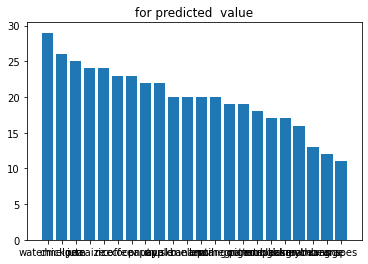

In [50]:
plt.bar(list(y_test['predicted_value'].value_counts().keys()),list(y_test['predicted_value'].value_counts().values))
plt.title('for predicted  value')

In [51]:
plt.scatter(list(y_test['label'].value_counts().values),list(y_test['predicted_value'].value_counts().values))

# By using RandomForest algo...

In [52]:
x=data.drop(columns=['label'],axis=1)
y=data[['label']]

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfr=RandomForestClassifier()

In [98]:
rfr.fit(x_train,y_train)

<ipython-input-98-3f392adc2e88>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestClassifier()

ðŸ˜ŠðŸ˜ŠðŸ˜ŠðŸ˜Š

In [99]:
rfr.score(x_test,y_test)            # superb accuracy

0.9886363636363636

# by using Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc=DecisionTreeClassifier()

In [34]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
dtc.score(x_test,y_test)              #by using decisiontree

0.9840909090909091

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)                    # its a good accuracy

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9840909090909091

In [41]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.975

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)                                 # good accuracy by using naive_bayes

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9977272727272727

In [43]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_test,y_test)                                

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8886363636363637

In [44]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
bnb.score(x_test,y_test) 

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.02727272727272727

In [45]:
lr.score(x_test,y_test) 
rfr.score(x_test,y_test)  
dtc.score(x_test,y_test) 
knn.score(x_test,y_test)
svc.score(x_test,y_test)
gnb.score(x_test,y_test)
mnb.score(x_test,y_test) 
bnb.score(x_test,y_test) 

0.02727272727272727

In [46]:
[lr.score(x_test,y_test),rfr.score(x_test,y_test),dtc.score(x_test,y_test),knn.score(x_test,y_test),svc.score(x_test,y_test),gnb.score(x_test,y_test),mnb.score(x_test,y_test),bnb.score(x_test,y_test)  

,


  

]

[0.9477272727272728,
 0.990909090909091,
 0.9840909090909091,
 0.9840909090909091,
 0.975,
 0.9977272727272727,
 0.8886363636363637,
 0.02727272727272727]

In [48]:
gnb.score(x_test,y_test)           # this is our best model 
# so i will go  to save this model

0.9977272727272727

In [1]:
import pickle

In [50]:
pickle.dump(gnb,open('farmer_guidence_model_with_99.77%_accuracy.pkl','wb'))

In [2]:
model=pickle.load(open('farmer_guidence_model_with_99.77%_accuracy.pkl','rb'))

C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GaussianNB from version 0.24.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [52]:
model.predict(x_test)

array(['mango', 'pigeonpeas', 'orange', 'cotton', 'mungbean', 'coconut',
       'pigeonpeas', 'maize', 'watermelon', 'mango', 'apple', 'chickpea',
       'pomegranate', 'coffee', 'papaya', 'grapes', 'apple', 'coconut',
       'papaya', 'rice', 'jute', 'grapes', 'lentil', 'cotton', 'maize',
       'coconut', 'pomegranate', 'mango', 'watermelon', 'jute', 'coconut',
       'kidneybeans', 'banana', 'coconut', 'rice', 'pomegranate',
       'blackgram', 'blackgram', 'pomegranate', 'jute', 'rice', 'lentil',
       'papaya', 'pomegranate', 'kidneybeans', 'mungbean', 'chickpea',
       'watermelon', 'lentil', 'coconut', 'mango', 'apple', 'grapes',
       'blackgram', 'maize', 'muskmelon', 'mungbean', 'muskmelon',
       'muskmelon', 'pomegranate', 'kidneybeans', 'lentil', 'rice',
       'coconut', 'pigeonpeas', 'rice', 'grapes', 'coconut', 'coffee',
       'maize', 'jute', 'pigeonpeas', 'mango', 'rice', 'rice',
       'muskmelon', 'rice', 'jute', 'cotton', 'banana', 'coconut',
       'mothbeans

In [54]:
y_test['predicted_value']=model.predict(x_test)

<ipython-input-54-22e6ef73ba12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predicted_value']=model.predict(x_test)


In [57]:
y_test.head()

label predicted_value
1159       mango           mango
499   pigeonpeas      pigeonpeas
1609      orange          orange
1924      cotton          cotton
661     mungbean        mungbean

In [58]:
y_test['label'].value_counts()

watermelon     29
rice           27
chickpea       26
maize          23
coconut        23
jute           23
papaya         23
apple          22
coffee         21
banana         20
mango          20
cotton         20
muskmelon      20
blackgram      19
lentil         18
pomegranate    18
pigeonpeas     17
mothbeans      16
mungbean       16
kidneybeans    16
orange         12
grapes         11
Name: label, dtype: int64

In [59]:
y_test['predicted_value'].value_counts()

watermelon     29
chickpea       26
rice           26
jute           24
maize          23
coconut        23
papaya         23
apple          22
coffee         21
banana         20
mango          20
cotton         20
muskmelon      20
blackgram      19
lentil         18
pomegranate    18
pigeonpeas     17
mothbeans      16
mungbean       16
kidneybeans    16
orange         12
grapes         11
Name: predicted_value, dtype: int64

In [61]:
y_test.head(20)

label predicted_value
1159        mango           mango
499    pigeonpeas      pigeonpeas
1609       orange          orange
1924       cotton          cotton
661      mungbean        mungbean
1839      coconut         coconut
475    pigeonpeas      pigeonpeas
141         maize           maize
1317   watermelon      watermelon
1107        mango           mango
1508        apple           apple
283      chickpea        chickpea
938   pomegranate     pomegranate
2129       coffee          coffee
1755       papaya          papaya
1293       grapes          grapes
1504        apple           apple
1873      coconut         coconut
1737       papaya          papaya
67           rice            rice

In [7]:
import pickle

In [8]:
model=pickle.load(open('farmer_guidence_model_with_99.77%_accuracy.pkl','rb'))

C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GaussianNB from version 0.24.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# THANK YOU ðŸ¤žðŸ˜ŽâœŒðŸŒ¹